In [1]:
import os
import re
import json
import matplotlib.pyplot as plt
import pandas as pd
import glob
from tqdm import notebook as tqdm
import sys; sys.path.insert(0, "..")
from program_synthesis.analysis.load_results import *
from program_synthesis.analysis.organize_results import *
from program_synthesis.analysis.models_to_analyze import model_labels

In [2]:
%matplotlib inline

In [3]:
accuracies = [table_of_accuracies(x, pbar=tqdm.tqdm) for x in model_labels]
accuracies = pd.concat(accuracies)

vanilla



vanilla-123-old



vanilla-123-old-real-nearai-finetuned-1e-4



vanilla-123-old-real-nearai32-finetuned-1e-4



aggregate-standard



aggregate-with-io



vanilla-real-nearai-finetuned-1e-4



aggregate-with-io-real-nearai-finetuned-1e-4



vanilla-real-nearai32-finetuned-1e-4



aggregate-with-io-real-nearai32-finetuned-1e-4


In [4]:
real_acs = get_for_baseline_models(accuracies, "nearai", "nearai32", "egnps64")

In [5]:
topline = separate_strategies(real_acs)
topline.to_csv("/home/kavigupta/topline.csv")

vanilla-real-nearai-finetuned-1e-4 egnps64,,best_first,,1,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,greedy,,5,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,greedy,,10,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,greedy,,25,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,greedy,,50,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,greedy,,100,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,best_first,,1,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,best_first,,5,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,best_first,,10,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,best_first,,25,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,best_first,,50,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64,,best_first,,100,,start-with-beams
vanilla-real-nearai-finetuned-1e-4 egnps64
aggregate-with-io-real-nearai-finetuned-1e-4 egnps64,,g

In [6]:
topline_by_k = by_k(topline)
topline_by_k.to_csv('/home/kavigupta/topline_by_k.csv')

In [7]:
just_max_step = by_max_step(accuracies)

In [8]:
def get_accuracies(model, data_source, data_label=None):
    selected_rows = (accuracies.Model == model) & (accuracies.DataSource == data_source)
    if data_label is not None:
        selected_rows &= accuracies.DataLabel == data_label
    return accuracies[selected_rows].pivot(index='Step', columns='DataLabel', values='Accuracy')
def plot_combined_accuracy(table, label, allowed_cols=None):
    if not table.index.size:
        return
    cols = sorted(table.columns)
    if allowed_cols is not None:
        cols = sorted(set(cols) & set(allowed_cols))
    result = sum(table[col] for col in cols) * 100 / len(cols)
    plt.plot(result, ".-", label=label)
    plt.xlabel("Step")
    plt.ylabel("Accuracy [%]")
    plt.legend()

In [9]:
# # temporary for thesis draft
# plt.figure(figsize=(7, 5))
# plt.title("Val Results on Mutation Dataset")
# for model in "vanilla", "aggregate-standard", "aggregate-with-io":
#     plot_combined_accuracy(get_accuracies(model, 'eval'), model.replace('-', ' ').title())

# plt.xlim(5 * 10 ** 4, 10 ** 6)
# plt.ylabel("% of programs that pass all given test cases")
# plt.show()

In [10]:
# # temporary for thesis draft
# plt.figure(figsize=(7, 5))
# plt.title("Val Results on Mutation Dataset")
# for model in model_labels:
#     if "finetuned" in model and "1e-4" in model:
#         plot_combined_accuracy(get_accuracies(model, 'eval'), model.replace('-', ' ').title())

# plt.ylabel("% of programs that pass all given test cases")
# plt.show()
# plt.figure(figsize=(7, 5))
# plt.title("Val Results on Real Dataset")
# for model in model_labels:
#     if "finetuned" in model and "1e-4" in model:
#         plot_combined_accuracy(get_accuracies(model, 'real', 'nearai'), model.replace('-', ' ').title())

# plt.ylabel("% of programs that pass all given test cases")
# plt.show()

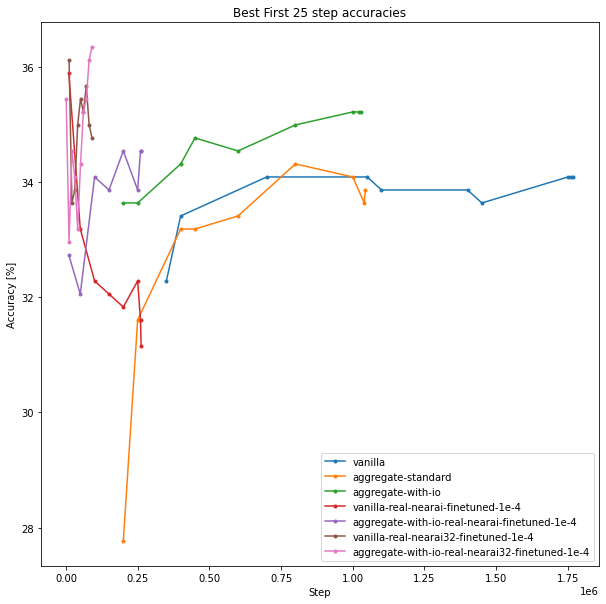

In [11]:
plt.figure(figsize=(10, 10))
plt.title("Best First 25 step accuracies")
for model in model_labels:
    plot_combined_accuracy(get_accuracies(model, 'real', 'nearai32,,best_first,,25,,start-with-beams'), model)

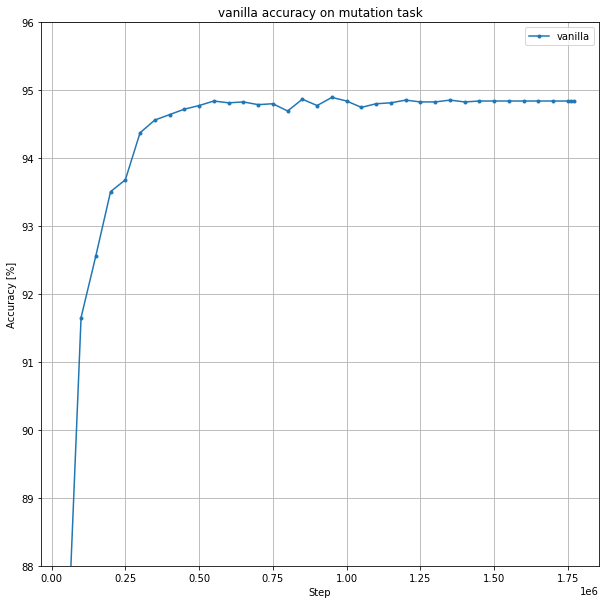

In [12]:
# plt.figure(figsize=(10, 10))
# plt.title("Best First 25 vanilla step accuracies on nearai32 (multiple starts)")
# for suffix in "-1", "-2", "-3", "":
#     model = "vanilla" + suffix
#     plot_combined_accuracy(get_accuracies(model, 'real', 'nearai32,,best_first,,25,,start-with-beams'), model)
# plt.show()
plt.figure(figsize=(10, 10))
plt.title("vanilla accuracy on mutation task")
for model in "old-vanilla_d9e7601", "old-vanilla-1", "old-vanilla-2", "bad-vanilla", "vanilla-1", "vanilla":
    plot_combined_accuracy(get_accuracies(model, 'eval'), model, allowed_cols={'1', '0,1', '0,0,1'})
plt.ylim(88, 96)
plt.grid()

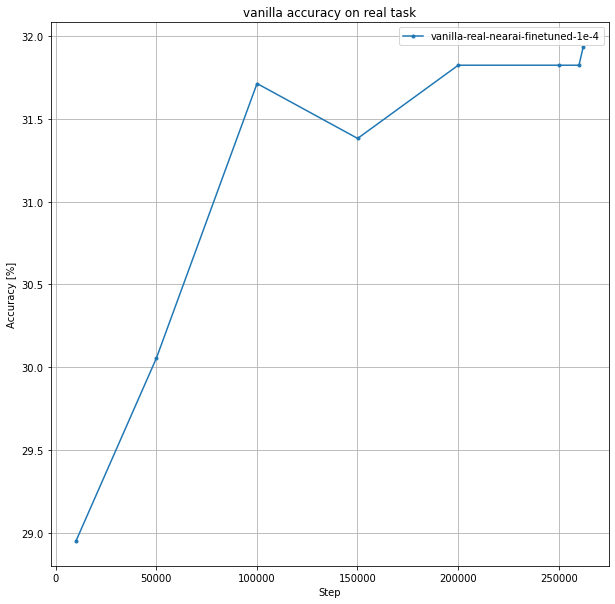

In [14]:
# plt.figure(figsize=(10, 10))
# plt.title("Best First 25 vanilla step accuracies on nearai32 (multiple starts)")
# for suffix in "-1", "-2", "-3", "":
#     model = "vanilla" + suffix
#     plot_combined_accuracy(get_accuracies(model, 'real', 'nearai32,,best_first,,25,,start-with-beams'), model)
# plt.show()
plt.figure(figsize=(10, 10))
plt.title("vanilla accuracy on real task")
for model in "vanilla-real-nearai-finetuned-1e-4",:
    plot_combined_accuracy(get_accuracies(model, 'real', 'nearai'), model)
plt.grid()